In [6]:
import pandas as pd
from sklearn import  linear_model
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from sklearn.linear_model import Ridge
from sklearn.cross_validation import KFold
import numpy as np

In [7]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = feature.apply(lambda x: int(x)**power)
            
    return poly_dataframe


In [8]:
sales = pd.read_csv('kc_house_data.csv', dtype=dict)
sales = sales.sort(['sqft_living','price'])

/Users/tatyanalarikova/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [9]:
l2_small_penalty = 1.5e-5
poly15_data = polynomial_dataframe(sales['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model = Ridge(l2_small_penalty, normalize=True)
model.fit(poly15_data, sales['price'])

Ridge(alpha=1.5e-05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [10]:
#Create a function that prints the polynomial coefficients in a pretty way :)
def print_coefficients(model):    
    # Get the degree of the polynomial
    #print model.coef_
    deg = len(model.coef_)
    
    # Get learned parameters as a list
    w = [model.intercept_] + list(model.coef_) 

    # Numpy has a nifty function to print out polynomials in a pretty way
    # (We'll use it, but it needs the parameters in the reverse order)
    print 'Learned polynomial for degree ' + str(deg) + ':'
    w.reverse()
    print np.poly1d(w)


In [11]:
print_coefficients(model)

Learned polynomial for degree 15:
           15             14             13             12
1.398e-54 x  + 3.782e-51 x  - 1.078e-46 x  - 2.724e-42 x 
             11             10             9            8             7
 - 3.88e-38 x  - 3.279e-34 x  + 6.526e-31 x + 8.28e-26 x + 1.511e-21 x
              6             5             4             3           2
 + 8.541e-18 x - 1.942e-13 x - 2.444e-09 x + 3.014e-05 x - 0.04774 x + 124.9 x + 2.207e+05


In [12]:
# dtype_dict same as above
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dict)
set_1 = set_1.sort(['sqft_living','price'])

set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dict)
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dict)
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dict)

/Users/tatyanalarikova/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [13]:
l2_small_penalty=1e-9

poly15_features_set = polynomial_dataframe(set_1['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model = Ridge(l2_small_penalty, normalize=True)
model.fit(poly15_features_set, set_1['price'])

Ridge(alpha=1e-09, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [14]:
def plot_data(data): 
    predictors = 'sqft_living'
    
    
    
    plt.plot(data[predictors],data['price'],'k.')
    plt.xlabel(predictors)
    plt.ylabel('price')



In [15]:
def plot_poly_predictions(data, model):
    plot_data(data)
    
    # Get the degree of the polynomial
    deg = len(model.coef_)
    
    predictors = 'sqft_living'
    
    # Create 200 points in the x axis and compute the predicted value for each point
    x_pred = data[predictors]
    
    y_pred = model.predict(poly15_features_set)
    
    # plot predictions
    plt.plot(data[predictors], y_pred, 'g-', label='degree ' + str(deg) + ' fit')
    plt.legend(loc='upper left')
    #plt.axis([0,1,-1.5,2])


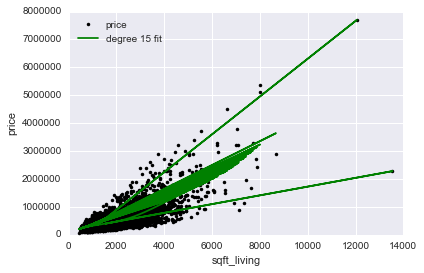

In [16]:
plot_poly_predictions(set_1, model)

In [17]:
print_coefficients(model)

Learned polynomial for degree 15:
            15             14             13           12
-3.352e-53 x  + 2.538e-49 x  + 5.566e-45 x  + 3.4e-41 x 
              11             10             9             8
 - 3.718e-37 x  - 1.041e-32 x  - 7.572e-29 x + 6.875e-25 x
              7             6             5             4             3
 + 1.479e-20 x - 1.391e-17 x - 3.905e-13 x - 1.172e-08 x + 0.0001224 x
           2
 - 0.3554 x + 544.7 x + 2.389e+04


In [18]:
l2_small_penalty=1e-9

poly15_features_set  = polynomial_dataframe(set_2['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model = Ridge(l2_small_penalty, normalize=True)
model.fit(poly15_features_set, set_2['price'])

Ridge(alpha=1e-09, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

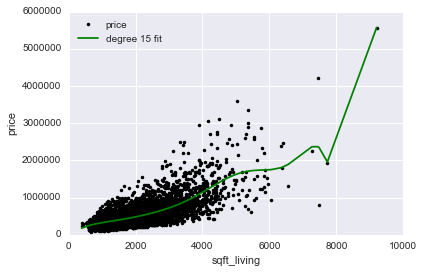

In [19]:
plot_poly_predictions(set_2, model)

In [20]:
print_coefficients(model)

Learned polynomial for degree 15:
           15             14             13            12
1.665e-50 x  - 1.388e-46 x  - 1.295e-42 x  + 3.28e-41 x 
              11             10             9             8
 + 9.259e-35 x  + 7.443e-31 x  - 1.446e-27 x - 6.308e-23 x
              7            6             5             4             3
 - 1.427e-19 x + 3.74e-15 x - 2.696e-12 x - 9.128e-08 x + 0.0004289 x
           2
 - 0.8181 x + 859.4 x - 5.561e+04


In [21]:
l2_small_penalty=1e-9

poly15_features_set  = polynomial_dataframe(set_3['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model = Ridge(l2_small_penalty, normalize=True)
model.fit(poly15_features_set, set_3['price'])

Ridge(alpha=1e-09, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

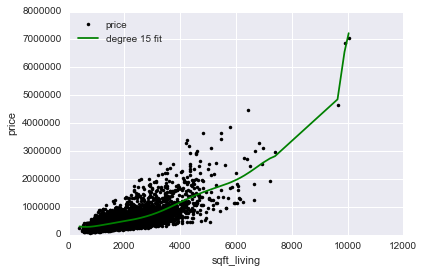

In [22]:
plot_poly_predictions(set_3, model)


In [23]:
print_coefficients(model)

Learned polynomial for degree 15:
            15             14             13             12
-3.933e-51 x  + 5.085e-47 x  + 3.191e-43 x  - 1.802e-39 x 
             11             10             9             8
 - 4.16e-35 x  - 1.971e-31 x  + 2.192e-27 x + 3.381e-23 x
              7             6            5            4             3
 - 2.137e-20 x - 2.886e-15 x + 7.15e-12 x + 7.78e-08 x - 0.0004589 x
           2
 + 0.9756 x - 755.4 x + 4.71e+05


In [24]:
l2_small_penalty=1e-9

poly15_features_set  = polynomial_dataframe(set_4['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model = Ridge(l2_small_penalty, normalize=True)
model.fit(poly15_features_set, set_4['price'])

Ridge(alpha=1e-09, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

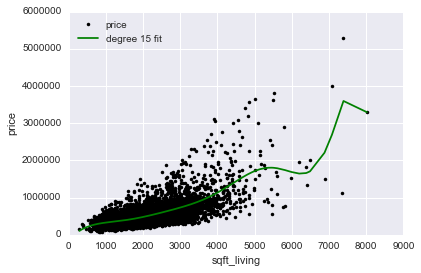

In [167]:
plot_poly_predictions(set_4, model)

In [168]:
print_coefficients(model)

Learned polynomial for degree 15:
           15             14            13             12            11
6.446e-50 x  - 8.796e-46 x  - 2.43e-42 x  + 3.477e-38 x  + 3.31e-34 x 
              10            9             8             7             6
 - 2.109e-32 x  - 1.96e-26 x - 9.493e-23 x + 7.668e-19 x + 5.772e-15 x
              5             4             3          2
 - 4.378e-11 x + 3.604e-08 x + 0.0003388 x - 0.9838 x + 1119 x - 1.457e+05


In [25]:
l2_large_penalty=1.23e2


In [26]:
poly15_features_set = polynomial_dataframe(set_1['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model = Ridge(l2_large_penalty, normalize=True)
model.fit(poly15_features_set, set_1['price'])

Ridge(alpha=123.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

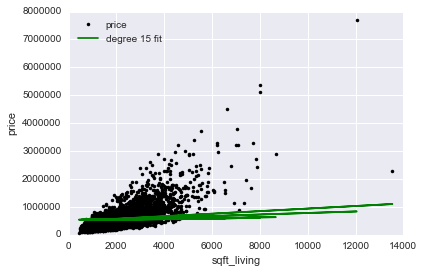

In [27]:
plot_poly_predictions(set_1, model)

In [28]:
print_coefficients(model)

Learned polynomial for degree 15:
           15             14             13             12
1.995e-58 x  + 2.855e-54 x  + 4.095e-50 x  + 5.895e-46 x 
              11             10             9             8
 + 8.519e-42 x  + 1.238e-37 x  + 1.816e-33 x + 2.704e-29 x
              7             6             5             4            3
 + 4.129e-25 x + 6.578e-21 x + 1.115e-16 x + 2.001e-12 x + 3.32e-08 x
              2
 + 0.0003536 x + 2.328 x + 5.391e+05


In [29]:
poly15_features_set = polynomial_dataframe(set_2['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model = Ridge(l2_large_penalty, normalize=True)
model.fit(poly15_features_set, set_2['price'])

Ridge(alpha=123.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

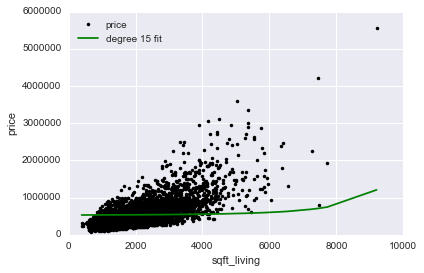

In [30]:
plot_poly_predictions(set_2, model)

In [31]:
print_coefficients(model)

Learned polynomial for degree 15:
          15             14             13             12
1.32e-55 x  + 1.232e-51 x  + 1.155e-47 x  + 1.087e-43 x 
              11             10             9             8
 + 1.031e-39 x  + 9.869e-36 x  + 9.572e-32 x + 9.445e-28 x
              7             6             5           4             3
 + 9.506e-24 x + 9.697e-20 x + 9.726e-16 x + 8.9e-12 x + 6.672e-08 x
              2
 + 0.0003908 x + 2.098 x + 5.299e+05


In [32]:
poly15_features_set = polynomial_dataframe(set_3['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model = Ridge(l2_large_penalty, normalize=True)
model.fit(poly15_features_set, set_3['price'])

Ridge(alpha=123.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

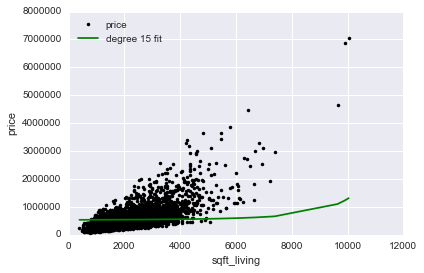

In [33]:
plot_poly_predictions(set_3, model)

In [34]:
print_coefficients(model)

Learned polynomial for degree 15:
           15             14             13             12
4.876e-56 x  + 4.859e-52 x  + 4.846e-48 x  + 4.842e-44 x 
             11            10             9             8             7
 + 4.85e-40 x  + 4.88e-36 x  + 4.947e-32 x + 5.071e-28 x + 5.288e-24 x
              6             5             4             3             2
 + 5.644e-20 x + 6.153e-16 x + 6.586e-12 x + 6.088e-08 x + 0.0004125 x + 2.289 x + 5.336e+05


In [35]:
poly15_features_set = polynomial_dataframe(set_4['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model = Ridge(l2_large_penalty, normalize=True)
model.fit(poly15_features_set, set_4['price'])

Ridge(alpha=123.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

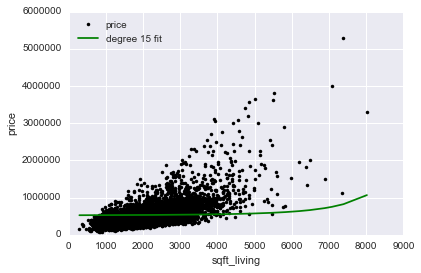

In [36]:
plot_poly_predictions(set_4, model)

In [37]:
print_coefficients(model)

Learned polynomial for degree 15:
           15            14             13             12            11
8.308e-55 x  + 6.86e-51 x  + 5.672e-47 x  + 4.701e-43 x  + 3.91e-39 x 
             10             9             8             7             6
 + 3.27e-35 x  + 2.756e-31 x + 2.346e-27 x + 2.016e-23 x + 1.736e-19 x
              5             4             3            2
 + 1.459e-15 x + 1.131e-11 x + 7.469e-08 x + 0.000405 x + 2.086 x + 5.246e+05


In [38]:
train_valid_shuffled = pd.read_csv('wk3_kc_house_train_valid_shuffled.csv', dtype=dict)
test = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dict)

In [39]:
train_valid_shuffled[0:10] # select rows 0 to 9


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2780400035,20140505T000000,665000,4,2.5,2800,5900,1,0,0,...,8,1660,1140,1963,0,98115,47.6809,-122.286,2580,5900
1,1703050500,20150321T000000,645000,3,2.5,2490,5978,2,0,0,...,9,2490,0,2003,0,98074,47.6298,-122.022,2710,6629
2,5700002325,20140605T000000,640000,3,1.75,2340,4206,1,0,0,...,7,1170,1170,1917,0,98144,47.5759,-122.288,1360,4725
3,0475000510,20141118T000000,594000,3,1,1320,5000,1,0,0,...,7,1090,230,1920,0,98107,47.6674,-122.365,1700,5000
4,0844001052,20150128T000000,365000,4,2.5,1904,8200,2,0,0,...,7,1904,0,1999,0,98010,47.3107,-122.001,1560,12426
5,2781280290,20150427T000000,305000,3,2.5,1610,3516,2,0,0,...,8,1610,0,2006,0,98055,47.4491,-122.188,1610,3056
6,2214800630,20141105T000000,239950,3,2.25,1560,8280,2,0,0,...,7,1560,0,1979,0,98001,47.3393,-122.259,1920,8120
7,2114700540,20141021T000000,366000,3,2.5,1320,4320,1,0,0,...,6,660,660,1918,0,98106,47.5327,-122.347,1190,4200
8,2596400050,20140730T000000,375000,3,1,1960,7955,1,0,0,...,7,1260,700,1963,0,98177,47.7641,-122.364,1850,8219
9,4140900050,20150126T000000,440000,4,1.75,2180,10200,1,0,2,...,8,2000,180,1966,0,98028,47.7638,-122.27,2590,10445


In [40]:

n = len(train_valid_shuffled)

k = 10 # 10-fold cross-validation
for i in xrange(k):
    start = (n*i)/k
    end = (n*(i+1))/k-1
    #print i, (start, end)

    train_valid_shuffled[0:start].append(train_valid_shuffled[end+1:n])    
    
    valid_set =  train_valid_shuffled.append(train_valid_shuffled[start:end+1])
    

    train_set = train_valid_shuffled[0:start].append(train_valid_shuffled[end+1:n])
    
train_set4 = pd.DataFrame()  
train_set4 = train_set4.append(train_set[(4*n)/k:(n*(4+1))/k-1])

valid_set4 =pd.DataFrame()
valid_set4 = valid_set4.append(valid_set[(4*n)/k:(n*(4+1))/k-1])



In [41]:
train_data= pd.read_csv('wk3_kc_house_train_data.csv')
valid_data = pd.read_csv('wk3_kc_house_valid_data.csv')
test_data = pd.read_csv('wk3_kc_house_test_data.csv')

In [42]:
alpha_values = np.logspace(3, 9, num=13)

print alpha_values

[  1.00000000e+03   3.16227766e+03   1.00000000e+04   3.16227766e+04
   1.00000000e+05   3.16227766e+05   1.00000000e+06   3.16227766e+06
   1.00000000e+07   3.16227766e+07   1.00000000e+08   3.16227766e+08
   1.00000000e+09]


In [43]:
def loo(k, alpha_values, data, output):
    #n = len(data)
    
    
    
    features = polynomial_dataframe(data['sqft_living'], 15) 
    

    
    predictors = features.columns.values
    
    target = data[output]
    
    
    result = features.join(target)
    
    
    
    folds = KFold(result.shape[0],k)
    
    
    # for each value of l2_penalty, fit a model for each fold and compute average MSE
    alpha_mse = []
    min_mse = None
    best_alpha = None
    for alpha in alpha_values:
        
        next_mse = 0.0
        for train_set, validation_set in folds:
            
            
            # train model
            model = linear_model.Ridge(alpha)
            
            train_predictors = (features.iloc[train_set, :])
            
    # The target  using to train the algorithm.
            train_target = data[output].iloc[train_set]
            
    # Training the algorithm using the predictors and target.
            model.fit(train_predictors, train_target)
           
           
            # predict on validation set 
            y_test_predicted = model.predict(features.iloc[validation_set])
           
            test_target = np.array(data[output].iloc[validation_set]).astype(int)
            test_target = test_target.astype(int)
            
            # compute squared error
            next_mse += ((y_test_predicted - test_target)**2).sum()
            
        # save squared error in list of MSE for each alpha
        next_mse = next_mse/k
        alpha_mse.append(next_mse)
        if min_mse is None or next_mse < min_mse:
            min_mse = next_mse
            best_alpha = alpha
            
    return alpha_mse,best_alpha
print loo(10, alpha_values, train_valid_shuffled, 'price' )

([2.5863731900182648e+53, 3.9973559465965429e+52, 7.9517195633556071e+51, 2.770673890191806e+51, 1.674921858308641e+51, 1.3843105962161089e+51, 1.2980536274688077e+51, 1.2713426983003947e+51, 1.2629526060627587e+51, 1.2603050921461662e+51, 1.2594684414089986e+51, 1.2592039258845518e+51, 1.2591202843981427e+51], 1000000000.0)


In [107]:
alpha_mse, best_alpha = loo(10, alpha_values, train_valid_shuffled, 'price' )

   
train_features= polynomial_dataframe(train_data['sqft_living'], 15)
train_target = train_data['price']
    
model = Ridge(best_alpha)
    
    
model.fit(train_features, train_target)
test_predicted = model.predict(polynomial_dataframe(test_data['sqft_living'], 15))
           
test_target = np.array(test_data['price']).astype(int)

RSS_test = ((test_predicted - test_target)**2).sum()
print RSS_test

3.57960334083e+45


In [44]:
def plot_poly_predictions(data, model):
    plot_data(data)
    
    # Get the degree of the polynomial
    deg = len(model.coef_)
    
    predictors = 'sqft_living'
    
    # Create 200 points in the x axis and compute the predicted value for each point
    x_pred = data[predictors]
    
    y_pred = model.predict(polynomial_dataframe(sales['sqft_living'], 15))
    
    # plot predictions
    plt.plot(data[predictors], y_pred, 'g-', label='degree ' + str(deg) + ' fit')
    plt.legend(loc='upper left')
    #plt.axis([0,1,-1.5,2])


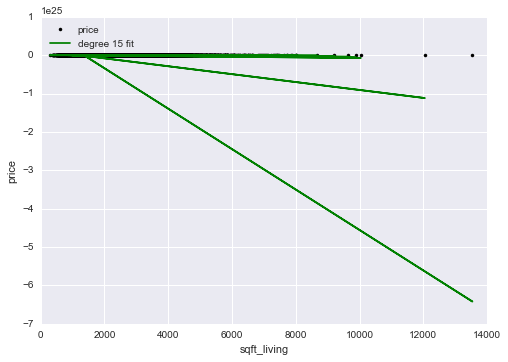

In [109]:
plot_poly_predictions(sales,model)